# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

- I first converted all observational values into strings. Then, I removed the commas and dollar signs and stripped white spaces to make all observations uniform. I then converted all values into float values for consistency and easy analysis. In the end, there were 0 missing values.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

- The proportion of values which are missing is 76.19%. The most common pattern that I see is that the most common types of force, which are bodily harm, chemical irritant, and taser, all have most of their data missing.  Maximal restraint and less lethal techniques also have 100% of their data missing which suggests problems within the recordkeeping system. More serious and rare types of force such as gun display and k-9 bites have less missing data. All in all, this would suggest harsher and rarer forms of force are better documented than more commonly used type of force.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.

4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

- There are 8,323 values missing in the Review Scores Rating category. The imputed median score might bias


In [40]:
import pandas as pd
import numpy as np

#Part 1
airbnb = pd.read_csv('airbnb_NYC.csv')

def clean_price(price):
    if pd.isna(price):
        return np.nan
    price_str = str(price).replace('$', '').replace(',', '').strip()
    try:
        return float(price_str)
    except:
        return np.nan

airbnb['Price_cleaned'] = airbnb['Price'].apply(clean_price)
print(f"Missing values in cleaned Price: {airbnb['Price_cleaned'].isna().sum()}")


#Part 2
police = pd.read_csv('mn_police_use_of_force.csv')

police["subject_injury"].value_counts(dropna=False)
police["subject_injury_cleaned"] = (
    police["subject_injury"]
    .str.strip()
    .str.title()
)

missing_prop = police["subject_injury_cleaned"].isna().mean()
missing_prop
print(f"Proportion of missing values: {missing_prop:.4f} ({missing_prop*100:.2f}%)")

crosstab = pd.crosstab(police['subject_injury_cleaned'],
                        police['force_type'],
                        dropna=False,
                        margins=True)
print(crosstab)

police['subject_injury_cleaned'] = police['subject_injury_cleaned'].fillna('Missing')

#Part 3
metabric = pd.read_csv('metabric.csv')

metabric['survival_dummy'] = (metabric['Overall Survival Status'].str.strip().str.lower() == 'living').astype(int)

#Part 4
missing_count = airbnb['Review Scores Rating'].isna().sum()
print(f"Missing values in Review Scores Rating: {missing_count}")

median_score = airbnb['Review Scores Rating'].median()
airbnb['Review_Scores_Rating_imputed'] = airbnb['Review Scores Rating'].fillna(median_score)

print(f"Median score used for imputation: {median_score}")

Missing values in cleaned Price: 0
Proportion of missing values: 0.7619 (76.19%)
force_type              Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_cleaned                                                    
No                          0          1093                131        2   
Yes                         2          1286                 41        0   
NaN                         2          7051               1421        0   
All                         4          9430               1593        2   

force_type              Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_cleaned                                                      
No                                     33                 34            0   
Yes                                    44                 40            0   
NaN                                    27                 74           87   
All                                   104                148           87   

force

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

    It is an excel file so you can do read_excel.

2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

    One observation is one incident of a shark attack, This is important because each row represents one single event and can help us learn about the victim and type of fatality.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

    Attacks have generally been increasing since 1940, however there have been periods of decline such as between 1960 and 1980 and since 2020.

5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
74% of attacks are unprovoked.
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

    Attacks are much more likely to be fatal when they are unprovoked or unknown. This may be because provoked attacks occur with smaller sharks and may only be defensive bites whereas provkoked bites might be larger sharks looking that are less defensive.

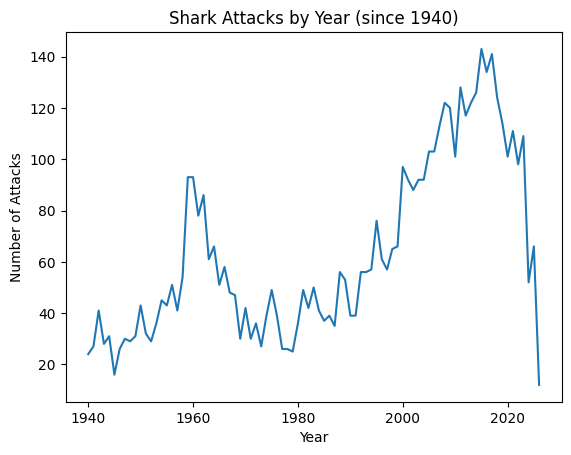

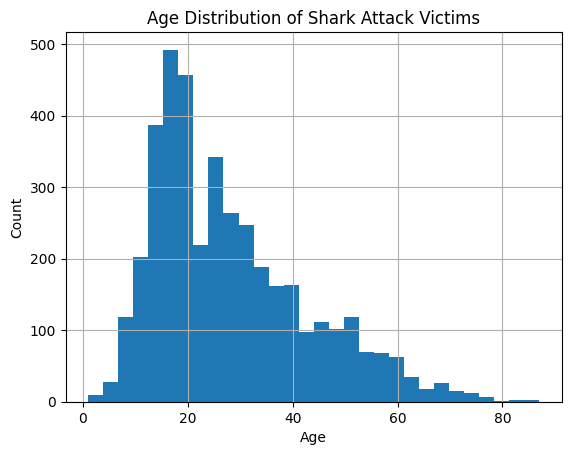

Proportion of attacks that are unprovoked: 0.74


Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.951713,0.017134,0.031153
Unknown,0.373134,0.460199,0.166667
Unprovoked,0.741102,0.016265,0.242633


In [25]:
import matplotlib.pyplot as plt

sharks = pd.read_excel("GSAF5.xls")
sharks = sharks.dropna(axis=1, how="all")

sharks["Year_clean"] = pd.to_numeric(
    sharks["Year"],
    errors="coerce"
)
sharks["Year_clean"].describe()

sharks_1940 = sharks[sharks["Year_clean"] >= 1940]

plt.figure()
sharks_1940.groupby("Year_clean").size().plot()
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Year (since 1940)")
plt.show()


sharks["Age_clean"] = (
    sharks["Age"]
    .astype(str)
    .str.extract(r"(\d+)")
)

sharks["Age_clean"] = pd.to_numeric(sharks["Age_clean"], errors="coerce")

plt.figure()
sharks["Age_clean"].dropna().hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Shark Attack Victims")
plt.show()

sharks["Type_clean"] = sharks["Type"].str.title()
sharks["Type_clean"] = sharks["Type_clean"].where(
    sharks["Type_clean"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)
(sharks["Type_clean"] == "Unprovoked").mean()
print(f"Proportion of attacks that are unprovoked: {(sharks['Type_clean'] == 'Unprovoked').mean():.2f}")

sharks["Fatal_clean"] = sharks["Fatal Y/N"].str.upper()
sharks["Fatal_clean"] = sharks["Fatal_clean"].where(
    sharks["Fatal_clean"].isin(["Y", "N"]),
    "Unknown"
)

pd.crosstab(
    sharks["Type_clean"],
    sharks["Fatal_clean"],
    normalize="index"
)




**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  
  The paper is about data tidying which is one small part of data cleaning. The paper discusses the parameters of tidy datasets and how to use the mechanism and how to turn messy data into tidy data.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  
  It was intended to allow for initional EDA of data and to simplify the development of tools used in data analysis.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first sentence means every messy dataset has unique problems and characteristics which make them "messy." This means that each messy dataset needs a different type of solution to make them "tidy." The second sentence

  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

KeyError: 'Foreign Source Country'

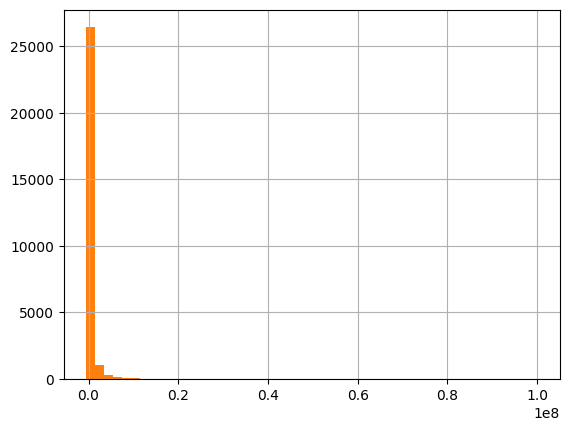

In [51]:
fg = pd.read_csv("ForeignGifts_edu.csv")

fg["Foreign Gift Amount"].hist(bins=50)

fg["Gift Type"].value_counts(normalize=True)

fg["Foreign Gift Amount"].hist(bins=50)

fg["Gift Type"].value_counts(normalize=True)

fg.groupby("Foreign Source Country")["Foreign Gift Amount"].count().sort_values(ascending=False).head(15)
fg.groupby("Foreign Source Country")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

inst_totals = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
inst_totals

fg.groupby("Institution Name")["Foreign Gift Amount"].sum().hist(bins=50)

fg.groupby("Gifter")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?